###<B><FONT COLOR="red">Tarea 4 Punto 3: Simulación estocástica con algoritmo de Gillespie </FONT>

####<B><FONT COLOR="blue">A) Programe una simulación de la expresión de un gen correspondiente a $dr/dt= K_{r} - Y_{r}r$ y  $dp/dt = K_{p}r - Y_{p}p$ , usando el algoritmo de Gillespie. Escoja constantes Biológicamente relevantes.</FONT>
####<B><FONT COLOR="blue">B) Cree un programa que corra repetidamente su simulación para tener una muestra de 1000 células. Grafique el promedio del mRNA y la proteína en función del tiempo comenzando desde r(t=0)=0  y p(t=0)=0  y la distribución resultante en estado estacionario. Obtenga su promedio y ruido numéricamente.</FONT>
####<B><FONT COLOR="blue"> C) Determine cuánto tiempo tarda su programa para simular 10000 células durante 10/Yp unidades de tiempo.</FONT>

In [1]:
%pylab inline
import time

Yr=1.0/5.0
Yp=1.0/30.0
Kr=1.0
Kp=10.0

tmax=1000000
numcell=100
tiempofinal=999999999

proteinas=zeros((numcell,tmax))
ARN=zeros((numcell,tmax))
ttotal=zeros((numcell,tmax))

Populating the interactive namespace from numpy and matplotlib


In [2]:
to=time.clock()
for i in range (0,numcell):
    p=zeros(tmax)
    r=zeros(tmax)
    t=0.0
    j=0
    while t<tmax/1000:
        rnd=random.random()  
        rj=r[j]
        pj=p[j]   
        Ktotal=(Kp*rj)+(Kr)+(Yp*pj)+(Yr*rj)
        Krnorm=Kr/Ktotal
        Kpnorm=Kp*rj/Ktotal
        Ypnorm=Yp*pj/Ktotal
        Yrnorm=Yr*rj/Ktotal
        if(rnd<Krnorm):
            r[j+1]=rj+1.0
            p[j+1]=(pj)      
        elif(rnd>=Krnorm)&(rnd<Kpnorm+Krnorm)&(rj!=0): 
            r[j+1]=rj
            p[j+1]=pj+1.0
        elif(rnd>=Kpnorm+Krnorm)&(rnd<Kpnorm+Krnorm+Ypnorm)&(pj!=0):
            r[j+1]=rj
            p[j+1]=pj-1.0 
        elif(rnd>=Kpnorm+Krnorm+Ypnorm)&(rj!=0):
            r[j+1]=rj-1.0
            p[j+1]=pj     
        a=random.exponential(1.0/Ktotal)
        t+=a
        ttotal[i][j+1]=t
        j+=1
    if(tiempofinal>j):
        tiempofinal=j
    if (i%10==0):
        print("Número de células simuladas:",i+10)
    proteinas[i]=p
    ARN[i]=r
tiempo100=(time.clock()-to)
print("El tiempo de la simulación de 100 células es:",int(tiempo100),"segundos")

Número de células simuladas: 10
Número de células simuladas: 20
Número de células simuladas: 30
Número de células simuladas: 40
Número de células simuladas: 50
Número de células simuladas: 60
Número de células simuladas: 70
Número de células simuladas: 80
Número de células simuladas: 90
Número de células simuladas: 100
El tiempo de la simulación de 100 células es: 43 segundos


In [3]:
pfinal=zeros((numcell,int(tiempofinal)))
rfinal=zeros((numcell,int(tiempofinal)))
ttotalfinal=zeros((numcell,int(tiempofinal)))
for i in range (0,numcell):
    pfinal[i]=(proteinas[i])[0:int(tiempofinal)]
    rfinal[i]=(ARN[i])[0:int(tiempofinal)]
    ttotalfinal[i]=(ttotal[i])[0:int(tiempofinal)]
    if(i%10==0):
        print("Número de células simuladas:",i+10)

Número de células simuladas: 10
Número de células simuladas: 20
Número de células simuladas: 30
Número de células simuladas: 40
Número de células simuladas: 50
Número de células simuladas: 60
Número de células simuladas: 70
Número de células simuladas: 80
Número de células simuladas: 90
Número de células simuladas: 100


In [4]:
p=zeros((numcell,int(tiempofinal/100)))
r=zeros((numcell,int(tiempofinal/100)))
for i in range (0,numcell):
    for j in range (0, int(tiempofinal/100)):
        indice = (abs(ttotalfinal[i]-j)).argmin()
        p[i][j]=pfinal[i][indice]
        r[i][j]=rfinal[i][indice]
    if(i%10==0):
        print("Número de células simuladas:",i+10)

Número de células simuladas: 10
Número de células simuladas: 20
Número de células simuladas: 30
Número de células simuladas: 40
Número de células simuladas: 50
Número de células simuladas: 60
Número de células simuladas: 70
Número de células simuladas: 80
Número de células simuladas: 90
Número de células simuladas: 100


In [5]:
Rmean=0
Pmean=0
for i in range(0, len(p)):
    Rmean += r[i]
    Pmean += p[i]
Rmean/=len(r)
Pmean/=len(p)

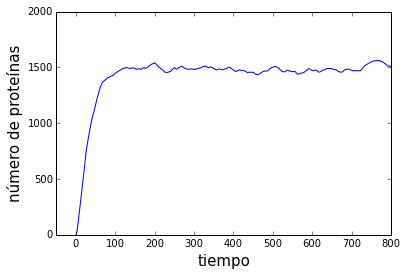

In [12]:
t=linspace(0,len(Pmean),len(Pmean))
plot(t,Pmean) 
ylim(0,2000)
xlim(-50,800)
ylabel('número de proteínas',size=15)
xlabel('tiempo',size=15)

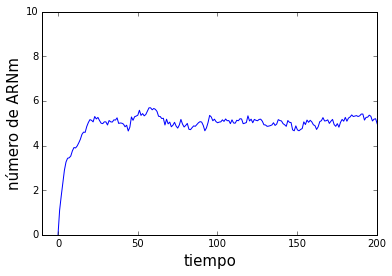

In [16]:
t=linspace(0,len(Rmean),len(Rmean))
plot(t,Rmean)
ylim(0,10)
xlim(-10,200)
ylabel('número de ARNm ',size=15)
xlabel('tiempo',size=15)

In [17]:
c=len(p[0])-1
DR=empty(0)
DP=empty(0)
for i in range(0,numcell):
    DP=append(DP,[p[i][c]])
    DR=append(DR,[r[i][c]])

El ruido es: 0.17488265797
El promedio es: 1493.36


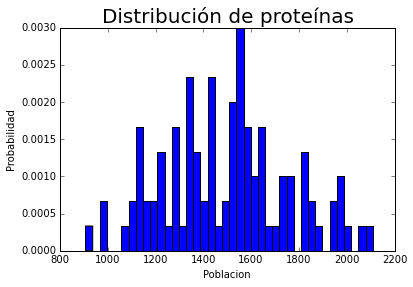

In [18]:
fig=count, bins, ignored = plt.hist(DP,40,normed=True)

title("Distribución de proteínas",size=20)
ylabel('Probabilidad')
xlabel('Poblacion')
plt.savefig('Distribucion de proteinas.pdf',dpi=250)
devesta= std(DP)
meanp= mean(DP)
ruido=(devesta)/meanp
print("El ruido es:",ruido)
print("El promedio es:",meanp)

El ruido es: 0.420484841263
El promedio es: 5.48


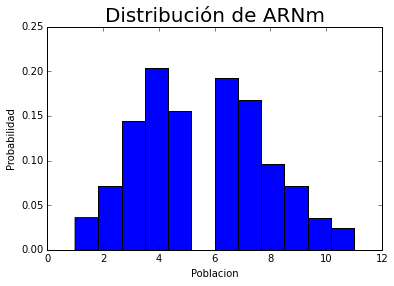

In [19]:
fig=count, bins, ignored = plt.hist(DR,12,normed=True)

title("Distribución de ARNm",size=20)
ylabel('Probabilidad')
xlabel('Poblacion')
devesta= std(DR)
meanp= mean(DR)
ruido=(devesta)/meanp
print("El ruido es:",ruido)
print("El promedio es:",meanp)

In [20]:
tiempo10000=tiempo100*100 
print("El tiempo para simular 10.000 células es:",tiempo10000/60,"minutos")
tao=tiempo10000/(10/Yp) # Unidades de 10/Yp
print("El tiempo para simular 10.000 células es:",tao,"en unidades de 10/Yp")

El tiempo para simular 10.000 células es: 69.06355833333332 minutos
El tiempo para simular 10.000 células es: 13.812711666666665 en unidades de 10/Yp
